In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

### warmup

In [2]:
def warmUpExercise():
    return(np.eye(5))

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Linear Regression in one variable

### plotting

In [4]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

In [5]:
X = data[:, 0]
y = data[:, 1]
X = np.array(X)
y = np.array(y)

In [6]:
m = data.shape[0]
m

97

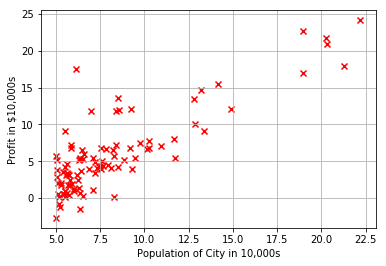

In [7]:
plt.scatter(X, y, c = 'r', marker = 'x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()

### gradient descent

In [8]:
print(X.shape)
X = np.concatenate((np.ones((m, 1)), X.reshape(m, 1)),axis=1)
print(X.shape)

(97,)
(97, 2)


In [9]:
def compute_cost(X, y, theta = [0, 0]):
    J = 0
    h = np.matmul(X, theta)
#     print ('sdfasdfasdfasd',theta,h)
    J = (1 / 2 * m) * np.sum(np.square((h - y)))
    return J

In [10]:
def gradient_descent(X, y, theta = np.array([0, 0]), alpha = 0.01, num_iters = 1500):
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = np.matmul(X, theta)
#         print (h.shape,X.shape,theta.shape)
        error = h - y
        theta = theta - (alpha / m) * np.matmul(np.transpose(X), error)
        J_history[iter] = compute_cost(X, y, theta)
    return(theta, J_history)

In [44]:
# def normalize(X):
#     mu = np.mean(X, axis = 0)
#     sigma = np.std(X, axis = 0)
#     print(mu,sigma)
#     for j in np.arange(X.shape[1]):
#         X[:,j] = (X[:,j] - mu[j]) / sigma[j]
#     return X

def normalize(X):
    newX = []
    for col in X.T:
        mean = np.mean(col.ravel())
        stdev = np.std(col.ravel())
        print(mean,stdev)
        col = (col - mean) / stdev
        newX.append(col.ravel())
    return np.array(newX).reshape(X.shape)

In [12]:
# theta for minimized cost J
theta , Cost_J = gradient_descent(X, y)
print('theta: ', theta.ravel())

theta:  [-3.63029144  1.16636235]


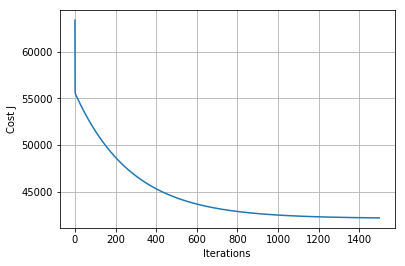

In [13]:
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.grid()

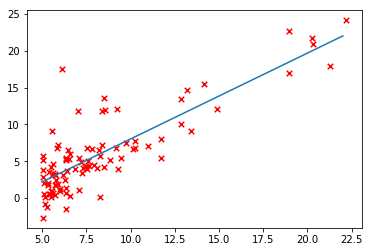

In [15]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

### scikit learn linear regression

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


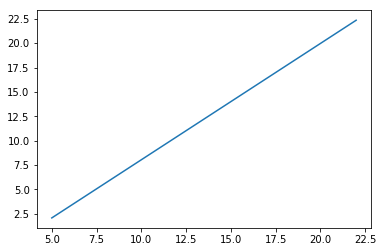

In [16]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

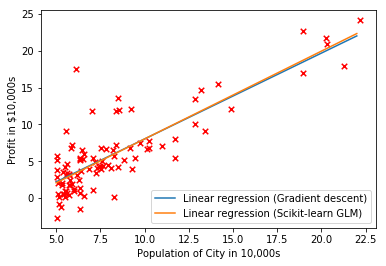

In [17]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [18]:
def predict(theta, t):
    t = [1, pop / 10000]
    return np.dot(theta, t) * 10000

In [19]:
# Predict profit for a city with population of 35000 and 70000
pop = 35000
print(predict(theta, pop))
pop = 70000
print(predict(theta, pop))

4519.7678677017675
45342.45012944714


### linear regression for multiple variables

In [52]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')

In [53]:
X = data[:, :2]
y = data[:, 2]
X = np.array(X)
y = np.array(y)
m = X.shape[0]
X= normalize(X)
print(X)

2000.6808510638298 786.2026187430467
3.1702127659574466 0.7528428090618781
[[ 1.31415422e-01 -5.09640698e-01]
 [ 5.07908699e-01 -7.43677059e-01]
 [ 1.27107075e+00 -1.99450507e-02]
 [-5.93588523e-01 -7.29685755e-01]
 [-7.89466782e-01 -6.44465993e-01]
 [-7.71822042e-02 -8.65999486e-04]
 [-1.40779041e-01  3.15099326e+00]
 [-9.31923697e-01  3.80715024e-01]
 [-8.65782986e-01 -9.72625673e-01]
 [ 7.73743478e-01  1.31050078e+00]
 [-2.97227261e-01 -1.43322915e-01]
 [-5.04552951e-01 -4.91995958e-02]
 [ 2.40309445e+00 -1.14560907e+00]
 [-6.90255715e-01  6.68172729e-01]
 [ 2.53521350e-01  8.09357707e-01]
 [-2.05647815e-01 -1.27280274e+00]
 [ 5.00114703e-02  1.44532608e+00]
 [-2.41262044e-01 -7.16966387e-01]
 [-9.68809863e-01  1.67029651e-01]
 [ 2.81647389e+00  2.05187753e-01]
 [-4.28236746e-01  3.01854946e-01]
 [ 7.20322135e-01 -1.01841540e+00]
 [-1.46104938e+00 -1.89112638e-01]
 [-1.01459959e+00 -2.26093368e-01]
 [-2.26093368e-01 -2.26093368e-01]
 [-1.55439190e+00  1.10220517e+00]
 [ 1.10220517e+

In [54]:
print(X.shape)
X = np.concatenate((np.ones((m, 1)), X.reshape(m, 2)),axis=1)
print(X.shape)

(47, 2)
(47, 3)


In [55]:
# theta for minimized cost J
theta , Cost_J = gradient_descent(X, y,theta = [0,0,0])
print('theta: ',theta.ravel())

theta:  [3.40000050e+05 1.68131811e+04 7.86578424e+01]


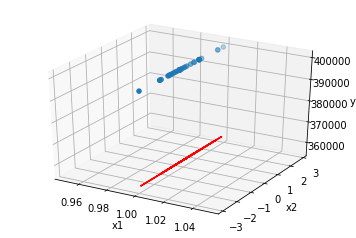

In [59]:
import mpl_toolkits.mplot3d as axes3d
nor_X = X
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.scatter(nor_X[..., 0].ravel(), nor_X[..., 1].ravel(), y[..., 0].ravel())
xs = list(nor_X[..., 0].ravel())
ys = list(nor_X[..., 1].ravel())
t0, t1, t2 = theta[0], theta[1], theta[2]
zs = []
for i in range(0, len(xs)):
    zs.append(t0 + t1*xs[i] + t2*ys[i])
ax1.plot(xs, ys, zs, c='r')
plt.show()

In [64]:
regr = LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
theta = regr.coef_

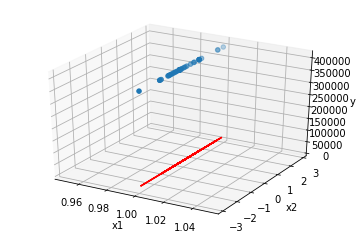

In [66]:
import mpl_toolkits.mplot3d as axes3d
nor_X = X
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.scatter(nor_X[..., 0].ravel(), nor_X[..., 1].ravel(), y[..., 0].ravel())
xs = list(nor_X[..., 0].ravel())
ys = list(nor_X[..., 1].ravel())
t0, t1, t2 = theta[0], theta[1], theta[2]
zs = []
for i in range(0, len(xs)):
    zs.append(t0 + t1*xs[i] + t2*ys[i])
ax1.plot(xs, ys, zs, c='r')
plt.show()